# 인공 신경망

In [1]:
# *실행마다 동일한 결과를 얻기 위해* 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적(determinate)으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST

In [2]:
# keras 데이터셋의 fashion_mnist 데이터 다운로드 -> 훈련 세트와 테스트 세트로 바로 나누어줌
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# 훈련 세트 데이터 크기 확인: 훈련 데이터 60000개의 28*28 픽셀의 이미지와 타깃 데이터 60000개(1차원 배열)
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [4]:
# 테스트 세트 크기 확인: 10000개의 이미지, 10000개의 타깃 데이터
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


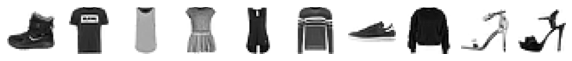

In [ ]:
# 훈련데이터의 샘플 눈으로 확인해보기
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))     # 1개 행, 10개 열 구조
for i in range(10):                                 # 상위 10개 데이터만 출력
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [ ]:
# 훈련 타깃(정답) 상위 10개 확인하기
print([train_target[i] for i in range(10)])

# 즉, [앵클부츠, 티셔츠, 티셔츠, 드레스, 티셔츠, 스웨터, 스니커즈, 스웨터, 샌달, 샌달]

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


참고) 패션 MNIST 타깃 숫자 레이블    

|레이블|0|1|2|3|4|5|6|7|8|9|
|:--|--|--|--|--|--|--|--|--|--|--|
|패션 아이템|티셔츠|바지|스웨터|드레스|코트|샌달|셔츠|스니커즈|가방|앵클부츠|

In [ ]:
# 레이블 당 샘플 개수 확인: 레이블 종류(unique 함수)와 각 레이블 당 개수(return_counts=True)
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기

전체 데이터를 한꺼번에 사용해서 훈련하기에는 데이터가 크다.   
하나씩 꺼내서 훈련하는 것이 더 효율적.   
-> _확률적 경사 하강법 : SGDClassifier_   

SGDClassifier 클래스의 loss 매개변수를 'log'로 지정하여   
로지스틱 손실 함수를 최소화하는 확률적 경사 하강법 모델을 만들 수 있다.   
이 때, 표준화 전처리 된 데이터를 사용해야 한다.   
우리가 불러온 이미지 데이터는 0\~255의 양수 값으로 이루어져 있어서,   
255로 나누어 0~1 사이의 값으로 정규화 할 수 있다.

In [7]:
train_input.nbytes # 해당 numpy 배열이 차지하는 바이트 용량을 확인할 수 있다.

47040000

In [8]:
train_scaled = train_input / 255.0              # 픽셀 값을 255로 나누어 0~1사이로 스케일링
train_scaled = train_scaled.reshape(-1, 28*28)  # reshape로 1차원배열로 변환

In [9]:
print(train_scaled.shape)                       # 변환 결과

(60000, 784)


In [ ]:
# SGDClassifier 클래스와 cross_validate 함수를 사용해 교차 검증으로 성능을 확인해보자.

from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)            # 손실함수가 로지스틱인 SGDClassifier 선언

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)          # 이를 교차 검증 실시
print(np.mean(scores['test_score']))                                        # 교차검증 평가

0.8196000000000001


반복 횟수(max_iter)를 5번으로 지정함   
반복 횟수를 늘려도 성능이 크게 향상되지는 않는다.

28*28, 총 784개의 특성이 있으므로, 로지스틱 회귀 공식이 아주 길어진다.   
각 10개 레이블에 대해서 서로 다른 **784개 가중치와 절편 1개(=모델 파라미터)**로 구성된, 총 10개의 방정식을 구성할 수 있다.   

## 인공신경망
이미지 분류에는 인공 신경망이 잘 맞는다.   
가장 기본적인 인공신경망은 기존에 학습했던 확률적 경사 하강법을 사용하는 로지스틱 회귀와 같다.   
다만 큰 볼륨을 적용하기에는 컴퓨터 성능이 따라주지 않아 못했던 것.   
이제는 할 수 있다 ^*^   

-> 다만 어떻게 성능을 높일 수 있는가?



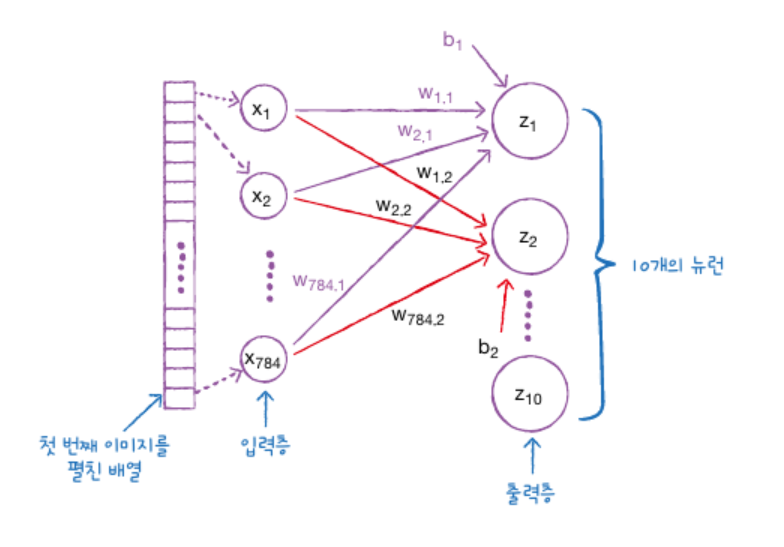

* 출력층(output layer): $z_1$ ~ $z_{10}$ 을 계산하고 이를 바탕으로 클래스 예측, 즉 신경망의 최종값을 만든다.
* 뉴런(neuron): z 값을 계산하는 단위. 선형 계산이 이루어진다. (=유닛unit)
* 입력층(input layer): $x_1$ ~ $x_{784}$까지, 입력받은 픽셀 값 그 자체. 특별한 계산을 수행하지 않는다.

### 텐서플로와 케라스
* 텐서플로: 구글이 공개한 딥러닝 라이브러리. 현재 2.x가 최신 버전. 코랩에 텐서플로가 이미 설치되어 있기 때문에 간단히 임포트하여 사용할 수 있다.
* 케라스: 텐서플로의 고수준 API. 그래픽 처리 장치인 GPU를 사용하여 인공 신경망을 훈련한다. (GPU는 벡터와 행렬 연산에 매우 최적화되어 있어, 곱셈과 덧셈이 많이 수행되는 인공 신경망에 적절하다.)
</br></br>

텐서플로는 케라스의 백엔드로서 GPU 연산을 수행해준다.   
텐서플로 라이브러리에 케라스 API가 내장되어 있고,   
케라스의 다른 백엔드 사용성 또한 더이상 개발되지 않고 있다.

In [10]:
# 텐서플로와 케라스 import
import tensorflow as tf
from tensorflow import keras

## 인공신경망으로 모델 만들기
**인공신경망에서는 교차 검증을 잘 사용하지 않고, 검증 세트를 별도로 덜어내어 사용한다.**
1. 충분히 데이터셋이 크기 때문에 검증 점수가 안정적이어서.
2. 교차검증까지 수행하기에는 시간이 너무 오래 걸려서.

그래서 검증은 한번만.

In [14]:
from sklearn.model_selection import train_test_split

# 훈련 세트에서 검증 세트 분리하기
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

# 훈련 세트 크기 확인
print(train_scaled.shape, train_target.shape)

# 검증 세트 크기 확인
print(val_scaled.shape, val_target.shape)

(38400, 784) (38400,)
(9600, 784) (9600,)


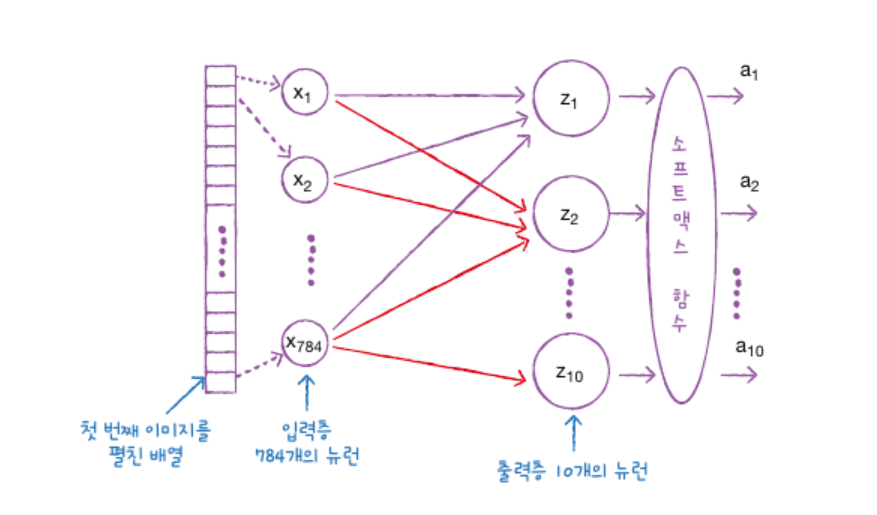

케라스의 레이어 패키지(keras.layers) 안에는 다양한 층이 있다.   
가장 기본이 되는 <u>밀집층(dense layer)</u>이 있다.   
입력층과 출력층 사이의 연결된 선이 밀집되어 밀집층이라고 부른다.   
<u>완전 연결층(fully connected layer)</u>: 양쪽의 뉴런이 모두 연결하고 있는 경우 완전 연결층이라고도 부른다.   
keras.layers.Dense 클래스를 사용해 밀집층을 만들어보자.

In [ ]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
# (출력 뉴런 개수, 뉴런의 출력에 적용할 함수, 입력의 크기) 매개변수를 가진다.
# 다중분류일 때 activation='softmax' : 출력되는 값을 확률로 바꾸어준다.
# 만약 이진분류라면 activation='sigmoid'

In [ ]:
# keras.Sequential 클래스의 객체를 만들때 앞서 선언한 dense 객체를 전달
model = keras.Sequential(dense)
# 이 model 객체가 바로 신경망 모델

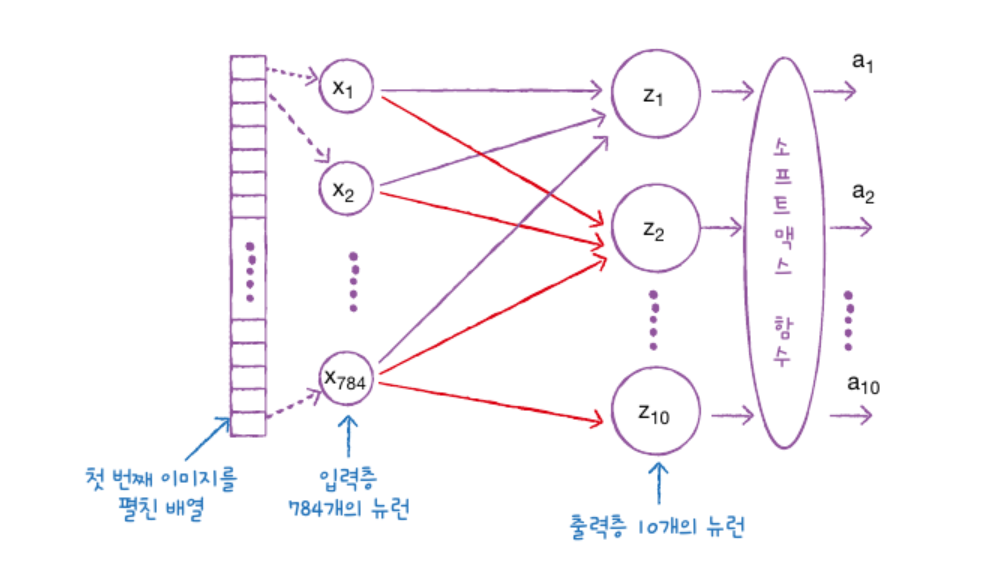

활성화 함수(activation fuction) : 뉴런의 선형 방정식 계산 '결과'에 적용하는 함수   
원-핫 인코딩(one-hot encoding) : 타깃값을 해당 클래스만 1이고 나머지는 모두 0인 배열로 만드는 것   

## 인공신경망으로 패션 아이템 분류하기

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
print(train_target[:10])
# loss ##########################################################
# 텐서플로에서는 원-핫 인코딩으로 바꾸지 않고 그냥 사용할 수 있다.
# sparse_categorical_crossentropy : 정수로 된 타깃값을 사용해, 크로스 엔트로피 손실을 계산하기 때문 (sparse = 희소)
# 타깃값을 원-핫 인코딩으로 준비했다면, loss='categorical_crossentropy')

# metrics #######################################################
# 케라스는 모델이 훈련할 때 기본으로 에포크마다 손실 값을 출력
# 에포크가 진행될 때마다 손실이 줄어든다 = 훈련이 잘 되었다
# 정확도도 함께 출력하기 위해 metrics='accuracy'

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 3ms/step - loss: 0.6069 - accuracy: 0.7947
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4742 - accuracy: 0.8382
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4508 - accuracy: 0.8474
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4367 - accuracy: 0.8527
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4280 - accuracy: 0.8555


In [ ]:
# 검증 단계: 모델의 성능을 평가하는 메서드 evaluate() 사용
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4526 - accuracy: 0.8465


[0.45262548327445984, 0.8464999794960022]

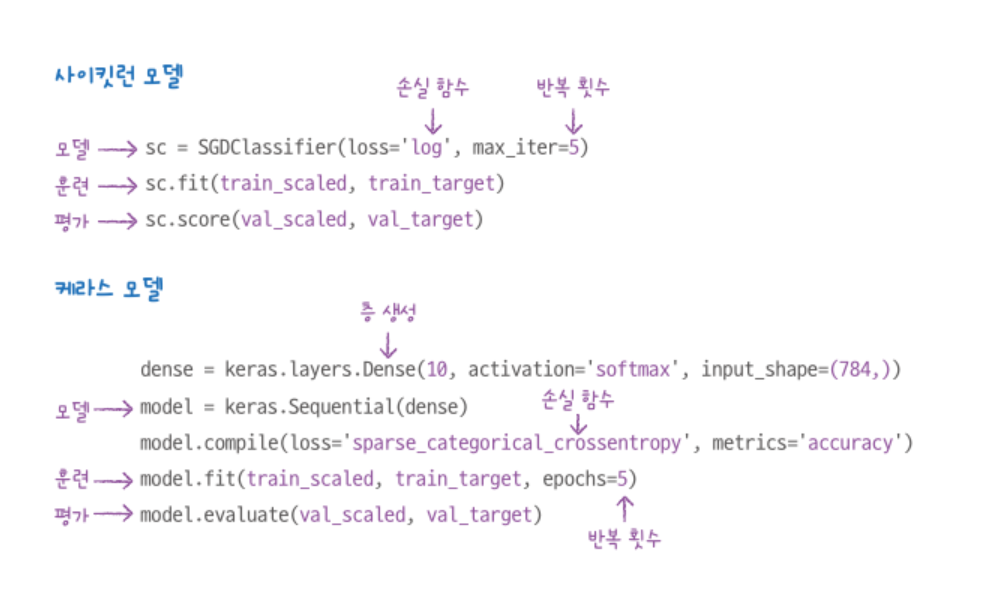